## **COVID-19 - Pandemic in India!**
This is the part 1. This is Data analysis and data visualization part, I am going to explore the COVID situation in India.

Task that I am going to perform:

*   Scrape out the COVID-19 Data from Ministry of Health and Family Welfare Government of India websites
*   Analysing the data and fetching information from the data
*   Figure out the death rate and cure rate per 100 across the affected states
*   Using GeoPandas and Matplotlib, Visualizing Covid-19 Confirmed cases statewise.

In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [0]:
# get data

DataLink = 'https://www.mohfw.gov.in/'
req = requests.get(DataLink)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [0]:
#thead is used to get table head taking -1 since my target table is the last table in the page
thead = soup.find_all('thead')[-1]
#get rows from table head
head = thead.find_all('tr')
#get the tbody it contains the contents
tbody = soup.find_all('tbody')[-1]
#get all the contents from rows in the table body
#each row contains each entry of the state
body = tbody.find_all('tr')

In [0]:
#Fetching Table contents
#=======================

head_rows = []
body_rows = []

#Appending each row from head to head_rows
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)

#Appending each row from body to body_rows
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)


In [232]:
#save contents in the DataFrame
#==============================
    
# skip last 6 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6],columns=head_rows[0])         
# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)
# Showing Table in which Covid-19 Data given statewise
df_bs

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,5,33,0,38
1,Andhra Pradesh,2765,3314,84,6163
2,Arunachal Pradesh,84,7,0,91
3,Assam,2081,1960,8,4049
4,Bihar,2261,4170,39,6470
5,Chandigarh,54,293,5,352
6,Chhattisgarh,891,763,8,1662
7,Dadra and Nagar Haveli and Daman and Diu,34,2,0,36
8,Delhi,24032,15823,1327,41182
9,Goa,490,74,0,564


### **Data Cleaning**

In this section I am going to perform some following operations to clean the data:
*  Making a copy of Data
*  Changing the name of columns 
*  There are some symbols which I am going to remove in this section
*  Finding if there is any missing values and if present then filling or removing those values

In [0]:
#saving a copy of the dataframe
df_India = df_bs.copy()
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [234]:
# Rename the columns
df_India = df_India.rename(columns={'Name of State / UT' : 'State/UnionTerritory','Active Cases*':'Active cases', 'Cured/Discharged/Migrated*':'Cured','Deaths**':'Deaths',
                                    'Total Confirmed cases*':'Confirmed'})
df_India.head(36)


,State/UnionTerritory,Active cases,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,5,33,0,38
1,Andhra Pradesh,2765,3314,84,6163
2,Arunachal Pradesh,84,7,0,91
3,Assam,2081,1960,8,4049
4,Bihar,2261,4170,39,6470
5,Chandigarh,54,293,5,352
6,Chhattisgarh,891,763,8,1662
7,Dadra and Nagar Haveli and Daman and Diu,34,2,0,36
8,Delhi,24032,15823,1327,41182
9,Goa,490,74,0,564


In [236]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory    0
Active cases            0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [0]:
# saving data
# ===========

# today's date
now  = datetime.now()
# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [0]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [239]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UnionTerritory  35 non-null     object
 1   Active cases          35 non-null     object
 2   Cured                 35 non-null     object
 3   Deaths                35 non-null     object
 4   Confirmed             35 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [0]:
#Making copy of the data sets and conveting values into integers
df = df_India.copy()
df['Confirmed'] = df['Confirmed'].apply(lambda x: int(x))
df['Active cases'] = df['Active cases'].apply(lambda x: int(x))
df['Cured'] = df['Cured'].apply(lambda x: int(x))
df['Deaths'] = df['Deaths'].apply(lambda x: int(x))

## Analysing COVID19 Cases in India

In [245]:
total_cases = df['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (14th June, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (14th June, 2020): 325452


In [246]:
#highlight the dataframe
df.style.background_gradient(cmap='Greens')

,State/UnionTerritory,Active cases,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,5,33,0,38
1,Andhra Pradesh,2765,3314,84,6163
2,Arunachal Pradesh,84,7,0,91
3,Assam,2081,1960,8,4049
4,Bihar,2261,4170,39,6470
5,Chandigarh,54,293,5,352
6,Chhattisgarh,891,763,8,1662
7,Dadra and Nagar Haveli and Daman and Diu,34,2,0,36
8,Delhi,24032,15823,1327,41182
9,Goa,490,74,0,564


In [247]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_06_15 are:  169798
Total people who were detected COVID+ve as of 2020_06_15 are:  325452
Total people who died due to COVID19 as of 2020_06_15 are:  9520
Total active COVID19 cases as of 2020_06_15 are:  146134


In [177]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Confirmed'] - (df['Deaths'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 146134


,Total Active
State/UnionTerritory,
Maharashtra,53030
Delhi,24032
Tamil Nadu,19679
Gujarat,5742
West Bengal,5552
Uttar Pradesh,4948
Haryana,4117
Karnataka,2959
Rajasthan,2836


In [248]:
import numpy as np
state_cases = df.groupby('State/UnionTerritory')['Confirmed',"Active cases",'Deaths','Cured'].max()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active cases"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,Confirmed,Active cases,Deaths,Cured,Death Rate (per 100),Cure Rate (per 100)
State/UnionTerritory,,,,,,
Maharashtra,107958,53030,3950,50978,3.660000,47.220000
Tamil Nadu,44661,19679,435,24547,0.970000,54.960000
Delhi,41182,24032,1327,15823,3.220000,38.420000
Gujarat,23544,5742,1477,16325,6.270000,69.340000
Uttar Pradesh,13615,4948,399,8268,2.930000,60.730000
Rajasthan,12694,2836,292,9566,2.300000,75.360000
West Bengal,11087,5552,475,5060,4.280000,45.640000
Madhya Pradesh,10802,2666,459,7677,4.250000,71.070000
Haryana,7208,4117,88,3003,1.220000,41.660000


In [0]:
import geopandas as gpd
shp_file ='/content/Indian_States.shp'
map_df = gpd.read_file(shp_file)
map_india = map_df
map_india['st_nm'].replace('NCT of Delhi', 'Delhi', inplace=True)
map_india.sort_values(by=['st_nm'],inplace=True)
map_india = map_india.drop(index = 7,axis = 0)
map_india = map_india.reset_index()
map_india.drop('index',axis=1,inplace=True)
map_india = pd.concat([map_india,df.iloc[:,4]],axis=1)

In [251]:
map_india.isna().sum()

st_nm        0
geometry     0
Confirmed    0
dtype: int64

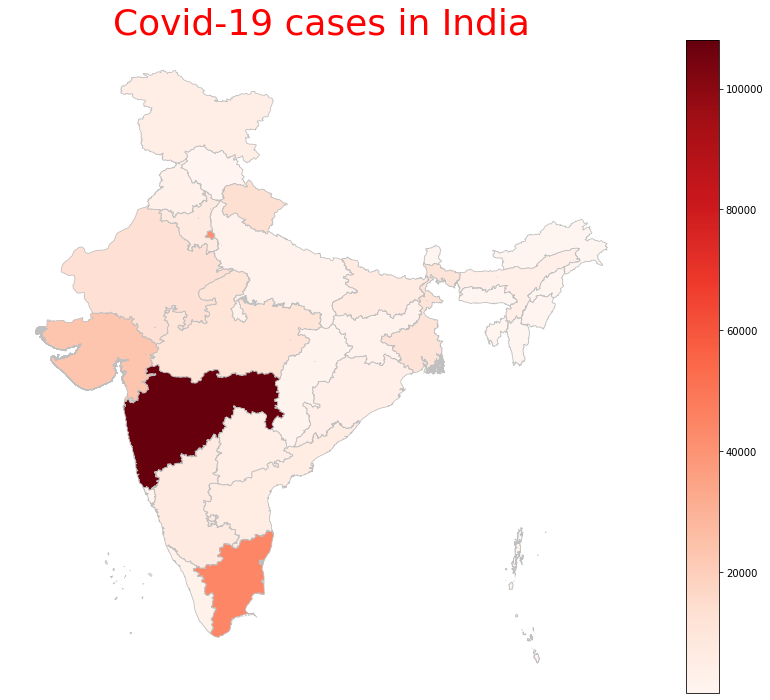

In [252]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(18, 12))
ax.axis('off')
ax.set_title('Covid-19 cases in India', fontdict={'fontsize': '36', 'fontweight' : '5','color':'r'})

# plot the figure
map_india.plot(column='Confirmed', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='.75', legend=True)

plt.show()